In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import random
import copy
import random
from collections import OrderedDict
import tarfile
import itertools
import json
%matplotlib inline

## Reading Email data 
Source: https://www.cs.cornell.edu/~arb/data/email-Eu/index.html

This is a temporal higher-order network dataset, which here means a sequence of timestamped simplices where each simplex is a set of nodes. In email communication, messages can be sent to multiple recipients. In this dataset, nodes are email addresses at a European research institution. The original data source only contains (sender, receiver, timestamp) tuples, where timestamps are recorded at 1-second resolution. Simplices consist of a sender and all receivers such that the email between the two has the same timestamp. We restricted to simplices that consist of at most 25 nodes. Some basic statistics of this dataset are:
- number of nodes: 998
- number of timestamped simplices: 234,760
- number of unique simplices: 25,791
- number of edges in projected graph: 29,299

Data restricted to simplices with at most 25 nodes:
- email-Eu.tar.gz (timestamped simplices)
- email-Eu-proj-graph.tar.gz (weighted projected graph)

## File with simplices
Each timestamped simplex dataset consists of three files:
1. dataset-nverts.txt
2. dataset-simplices.txt
3. dataset-times.txt

All three files represent a vector of integers. There is one integer per line.

The first file contains the number of vertices within each simplex. The second
file is a contiguous list of the nodes comprising the simplices, where the
ordering of the simplices is the same as in the first file. The third file
contains the timestamps for each simplex. The length of the vectors in the first
and third files is the same, and the length of the vector in the second file is
the sum of the integers in the first file.

In [24]:
filename_nvert = '../Data/email-Eu/email-Eu-nverts.txt'
nvert_list = [] #list of integers, representing the size of each simplex
with open(filename_nvert) as f:
    nvert_list = [int(line) for line in f]
f.close()

filename_simplices = '../Data/email-Eu/email-Eu-simplices.txt'
simplices_vertex_list = [] #list of integers, each element is the ID of a vertex, following the order of nvert_list
with open(filename_simplices) as f:
    simplices_vertex_list = [int(line) for line in f]
f.close()

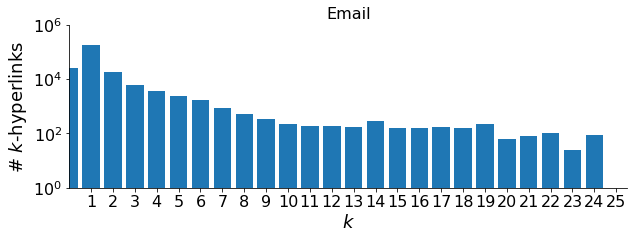

In [5]:
from collections import Counter
count = Counter(nvert_list)

plt.figure(figsize=(10,3))

ax = plt.subplot(1,1,1)

ax.bar(np.array(list(count.keys()))-1, count.values())
ax.set_title('Email', size=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel(r'$k$', size=18)
ax.set_ylabel(r'# $k$-hyperlinks', size=18)
ax.set_yscale('log')
ax.set_xticks(range(1,26))
ax.set_xlim(0,25.5)
ax.set_ylim(1e0,1e6)
    
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#plt.xticks(range(26))
#plt.xlim(0.3,25.8);

In [25]:
list_simplices = []

upper_index = 0
for i, simplex_size in enumerate(nvert_list):
    lower_index = upper_index
    upper_index += simplex_size
    simplex = simplices_vertex_list[lower_index:upper_index]
    
    #Removing isolated nodes
    if len(simplex)>1:
        list_simplices.append(simplex)

In [7]:
f = open('../Data/email-Eu/Processed_data/email-Eu_simplices.json','w')
json.dump(list_simplices, f)
f.close()

# Same on Congress bills data

In [27]:
filename_nvert = '../Data/congress-bills/congress-bills-nverts.txt'
nvert_list = [] #list of integers, representing the size of each simplex
with open(filename_nvert) as f:
    nvert_list = [int(line) for line in f]
f.close()

filename_simplices = '../Data/congress-bills/congress-bills-simplices.txt'
simplices_vertex_list = [] #list of integers, each element is the ID of a vertex, following the order of nvert_list
with open(filename_simplices) as f:
    simplices_vertex_list = [int(line) for line in f]
f.close()

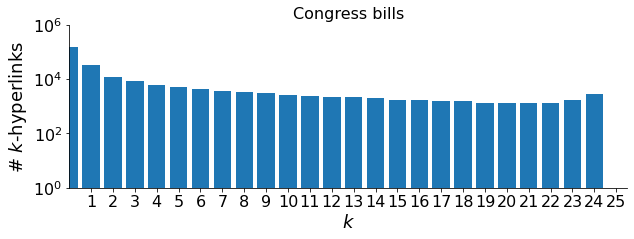

In [9]:
from collections import Counter
count = Counter(nvert_list)

plt.figure(figsize=(10,3))

ax = plt.subplot(1,1,1)

ax.bar(np.array(list(count.keys()))-1, count.values())
ax.set_title('Congress bills', size=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel(r'$k$', size=18)
ax.set_ylabel(r'# $k$-hyperlinks', size=18)
ax.set_yscale('log')
ax.set_xticks(range(1,26))
ax.set_xlim(0,25.5)
ax.set_ylim(1e0,1e6)
    
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#plt.xticks(range(26))
#plt.xlim(0.3,25.8);

In [10]:
list_simplices = []

upper_index = 0
for i, simplex_size in enumerate(nvert_list):
    lower_index = upper_index
    upper_index += simplex_size
    simplex = simplices_vertex_list[lower_index:upper_index]
    
    #Removing isolated nodes
    if len(simplex)>1:
        list_simplices.append(simplex)

In [11]:
f = open('../Data/congress-bills/Processed_data/congress-bills_simplices.json','w')
json.dump(list_simplices, f)
f.close()

# Extracting the sizes

In [2]:
import itertools

print('congress-bills')
cliques_list = json.load(open('../Data/congress-bills/Processed_data/congress-bills_simplices.json','r')) 
nodes =list(set(itertools.chain(*cliques_list)))
print(len(nodes), len(cliques_list))

print('email-Eu')
cliques_list = json.load(open('../Data/email-Eu/Processed_data/email-Eu_simplices.json','r')) 
nodes =list(set(itertools.chain(*cliques_list)))
print(len(nodes), len(cliques_list))

congress-bills
1718 105929
email-Eu
979 209005
